<a href="https://colab.research.google.com/github/markefuller/CAP4630/blob/master/hw1prob2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mark E Fuller
UCF CAP 4630 Fall 2019

**Problem 2:**

Extend [the notebook for solving linear regression using stochastic gradient descent](https://colab.research.google.com/drive/1ZKa5sIiSgS8P1RuNyH6yYcZ6F9S7Yiwu) to the case where there are two weights w1 and w2 and one bias term b.

# Setup Matplotlib

In [0]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Generate Data

In [0]:
import numpy as np
np.random.seed(42)

# Array(100,1) of uniformly distributed floats over [0,2)
x1 = 2 * np.random.rand(100, 1)
x2 = 2 * np.random.rand(100, 1)
ys = 4 + 3 * x1 + x2 + np.random.rand(100, 1)


# Plot Data

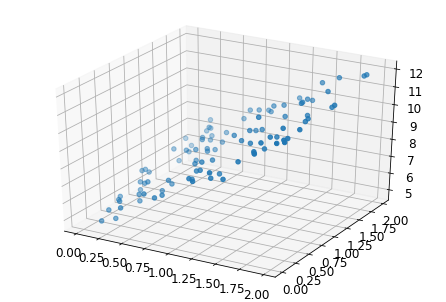

In [0]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x1, x2, ys, "b.")
plt.show()

# Divide Data into Training and Test Sets

In [0]:
# split the data into training and test sets
# train set
train_x1 = x1[:80]
train_x2 = x2[:80]
train_ys = ys[:80]
# test set
test_x1 = x1[80:]
test_x2 = x2[80:]
test_ys = ys[80:]


# Linear Regression using Numpy

In [0]:
# number of epochs
epochs = 10
# learning rate
lr = 0.01

In [0]:
# initial value for weight w and bias b
w1 = np.random.randn(1)
w2 = np.random.randn(1)
b = np.zeros(1)

In [0]:
for epoch in np.arange(epochs):
  for i in np.arange(80):
    y_pred = w1 * train_x1[i] + w2 * train_x2[i] + b
    
    grad_w1 = (y_pred - train_ys[i]) * train_x1[i]
    grad_w2 = (y_pred - train_ys[i]) * train_x2[i]
    grad_b = (y_pred - train_ys[i])
    
    w1 -= lr * grad_w1
    w2 -= lr * grad_w2
    b -= lr * grad_b

In [0]:
test_loss = 0
for i in np.arange(20):
  # test_loss += 0.5 * (w * test_xs[i] + b - test_ys[i]) ** 2
  test_loss += 0.5 * (w1 * test_x1[i] + w2 * test_x2[i] + b - test_ys[i]) ** 2
test_loss /= 20

In [0]:
test_loss

array([0.07365286])

In [0]:
pred_ys = (w1 * test_x1) + (w2 * test_x2) + b

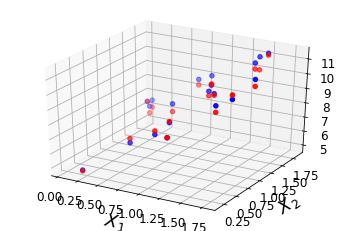

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(test_x1, test_x2, test_ys, c='r', marker='o')
ax.scatter(test_x1, test_x2, pred_ys, c='b', marker='o')
ax.set_xlabel('$X_1$', fontsize=18)
ax.set_ylabel('$X_2$', rotation=0, fontsize=18)

plt.show()

In [0]:
b

array([3.96994363])

In [0]:
w1

array([3.22776397])

In [0]:
w2

array([1.34723088])